<a href="https://colab.research.google.com/github/gokturkberke/tensorflow-deeplearning/blob/main/neural_network_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# A classification is where you try to classify something as one thing or another

## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

#make 1000 examples
n_samples =1000

#create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [3]:
#Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
#check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1" :X[:,1],"label":y})

In [6]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


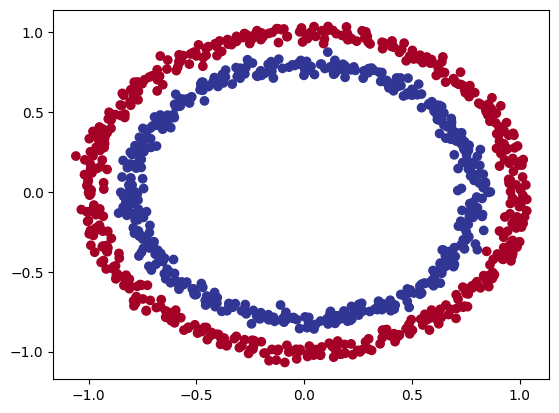

In [7]:
#lets visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);
#c=y: Her noktanın rengi y değişkenine göre belirleniyor

### Input and Output shapes

In [8]:
X.shape,y.shape

((1000, 2), (1000,))

In [9]:
len(X),len(y)

(1000, 1000)

In [10]:
X[0],y[0]

(array([0.75424625, 0.23148074]), np.int64(1))

### Steps in modelling

In [11]:
import tensorflow as tf

tf.random.set_seed(42)

#lets create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics= ["accuracy"])

#fit the model
model_1.fit(X,y,epochs=5)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4366 - loss: 5.3967
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4355 - loss: 4.8815
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4495 - loss: 2.1073
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4895 - loss: 0.7365
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4898 - loss: 0.7094


In [12]:
#improve the model
model_1.fit(X,y,epochs=200,verbose=0)

In [13]:
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4852 - loss: 0.6927  


[0.6932879686355591, 0.4729999899864197]

Since we're working on a binary classification problem and our model is getting around %50 accuracy...
So lets step things up. a notch and add and extra layer

In [14]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X,y,epochs=100,verbose=0)

In [15]:
model_2.evaluate(X,y) #we are evaluating the same data for now (train test we need to do)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4955 - loss: 0.6932  


[0.6931995153427124, 0.5]

In [16]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X,y,epochs=100,verbose=0)

In [17]:
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5147 - loss: 0.6926  


[0.6932058930397034, 0.49000000953674316]

In [18]:
model_3.predict(X)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.5045547 ],
       [0.4933388 ],
       [0.4929503 ],
       [0.49718863],
       [0.4997641 ],
       [0.49652392],
       [0.5002129 ],
       [0.50449467],
       [0.4955232 ],
       [0.49990976],
       [0.49261868],
       [0.504568  ],
       [0.49951434],
       [0.50315154],
       [0.50161123],
       [0.4982186 ],
       [0.49091238],
       [0.49754447],
       [0.49231312],
       [0.49217403],
       [0.50410926],
       [0.4963143 ],
       [0.49615446],
       [0.50455314],
       [0.49289733],
       [0.49211952],
       [0.5028003 ],
       [0.5042252 ],
       [0.49866375],
       [0.5023014 ],
       [0.49421343],
       [0.49909696],
       [0.50033045],
       [0.505901  ],
       [0.49549645],
       [0.49428946],
       [0.49564114],
       [0.5033862 ],
       [0.49879462],
       [0.5053984 ],
       [0.49243912],
       [0.50325674],
       [0.4917937 ],
       [0.5040856 ],
       [0.49113548],
       [0.49108773],
       [0.5004833 ],
       [0.501

In [19]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1 #eksen sinirlari belirledik
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), #100 esit parcaya bol
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions using the trained model
  y_pred = model.predict(x_in) #Model her grid noktası için tahmin yapar

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape) #Her satır için en yüksek olasılığın index'ini bulur ondan sonra (10000,) olan diziyi (100, 100) şekline çevirir
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape) #her satirdaki max degeri alir zaten(1 tane var binaryde ama olsun) sonra 0.5ten buuykse 1 degilse 0

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


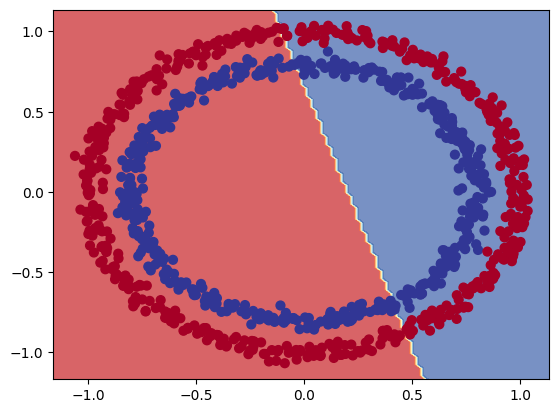

In [20]:
#check out the predciton
plot_decision_boundary(model=model_3,X=X,y=y)

In [21]:
x_min,x_max= X[:,0].min() - 0.1,X[:,0].max() + 0.1
y_min,y_max = X[:,1].min() - 0.1,X[:,1].max() + 0.1

x_min,x_max,y

(np.float64(-1.1595024599098636),
 np.float64(1.1337117525463374),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0

In [22]:
tf.random.set_seed(42)

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)

#split data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [23]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 451.7781 - mae: 451.7781
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 347.7929 - mae: 347.7929
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 241.2628 - mae: 241.2628
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 130.3954 - mae: 130.3954 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 45.1524 - mae: 45.1524 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 78.2458 - mae: 78.2458 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 70.8999 - mae: 70.8999 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 45.2456 - mae: 45.2456
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 48.9268 - mae: 48.9268 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 40.4308 - mae: 40.4308 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 43.7970 - mae: 43.7970 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41.7879 - mae: 41.7879 
Epoch 13/100
5/5 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


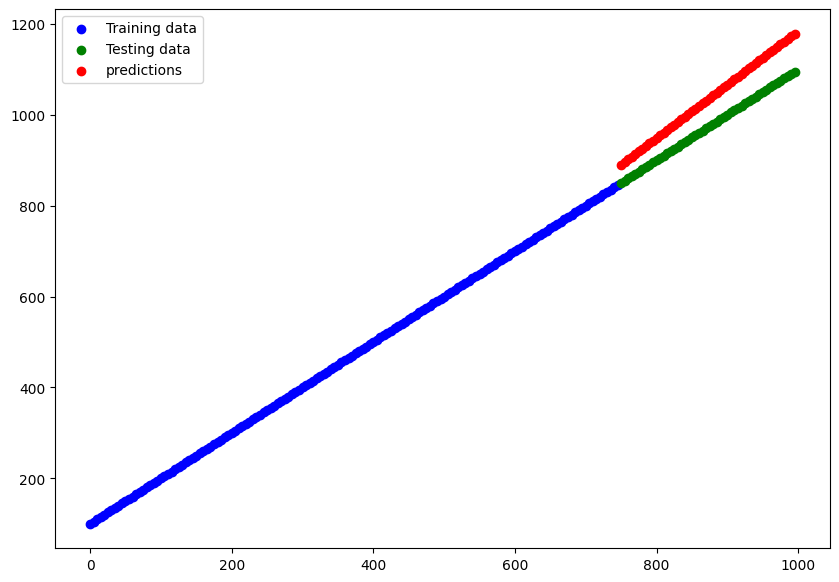

In [24]:
#Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

#plot the model predictinos
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b",label="Training data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="Testing data")
plt.scatter(X_reg_test,y_reg_preds,c="r",label="predictions")
plt.legend();

In [25]:
#NON-linearity

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

model_4.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4664 - loss: 4.7677   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4653 - loss: 4.6270 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4688 - loss: 4.5670 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4711 - loss: 4.5203 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4722 - loss: 4.4417 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4745 - loss: 4.4081
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4779 - loss: 4.3756 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4743 - loss: 4.3409 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4745 - loss: 4.2507 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4752 - loss: 4.1876 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4745 - loss: 3.9874 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

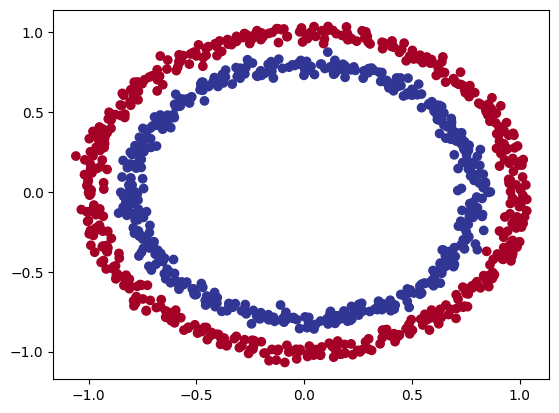

In [26]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classifcation...


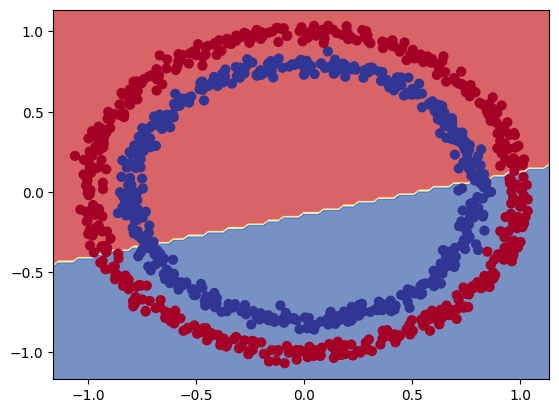

In [27]:
#Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,X=X,y=y)

In [28]:
#Lets try build or first neural network with non linear function

tf.random.set_seed(42)

#non linear activation anything except linear
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4830 - loss: 4.7210   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 4.6507 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 4.5250 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 4.4699 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4827 - loss: 4.2951 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4744 - loss: 4.1585 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4599 - loss: 4.0363
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4427 - loss: 3.8815
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4318 - loss: 3.7992
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4318 - loss: 3.7975
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4318 - loss: 3.7973
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - a

In [29]:
#time to replicate multi layer neural network

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

history = model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4830 - loss: 4.1446
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 3.6169
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 3.2675
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 2.7713
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4696 - loss: 1.7144
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4192 - loss: 1.0289
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4125 - loss: 1.0034
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4096 - loss: 0.9859
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4139 - loss: 0.9704
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4422 - loss: 0.9564
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4503 - loss: 0.9438
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [30]:
model_6.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5840 - loss: 0.6710  


[0.6651397347450256, 0.6140000224113464]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


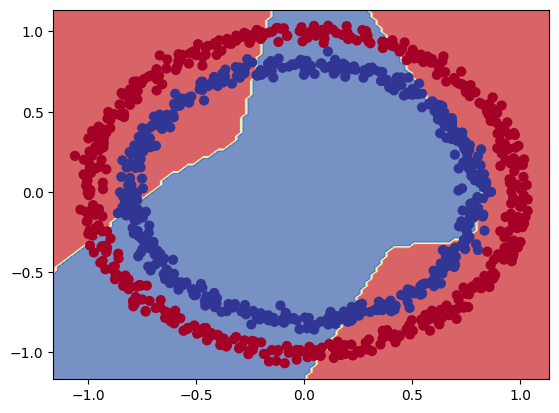

In [31]:
plot_decision_boundary(model_6,X,y)

In [32]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

history = model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4887 - loss: 0.7153
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4981 - loss: 0.7007 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5037 - loss: 0.6929
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5096 - loss: 0.6886
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5204 - loss: 0.6859
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5273 - loss: 0.6839
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5319 - loss: 0.6824
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5236 - loss: 0.6811
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5314 - loss: 0.6800
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5325 - loss: 0.6790
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5339 - loss: 0.6781
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [33]:
model_7.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8729 - loss: 0.3998  


[0.39299988746643066, 0.8790000081062317]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


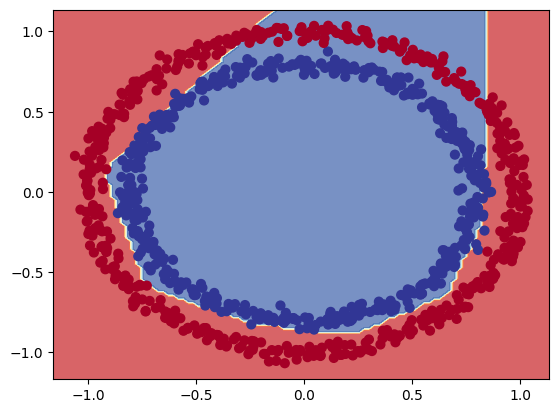

In [34]:
#lets visualize

plot_decision_boundary(model_7,X,y)

In [35]:
#Create a toy tensor
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

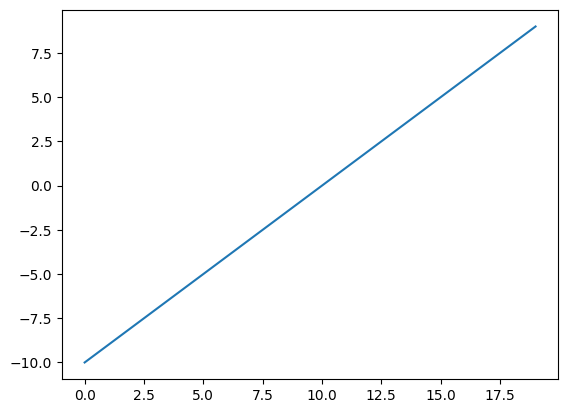

In [36]:
plt.plot(A)

In [37]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use the sigmoid function
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

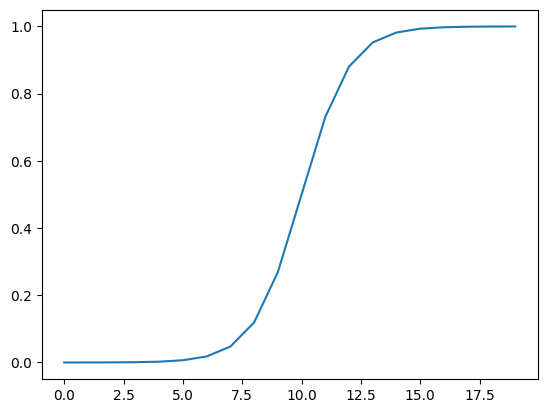

In [38]:
plt.plot(sigmoid(A))

In [39]:
def relu(x):
  return tf.maximum(0,x)

#Pass our toy tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

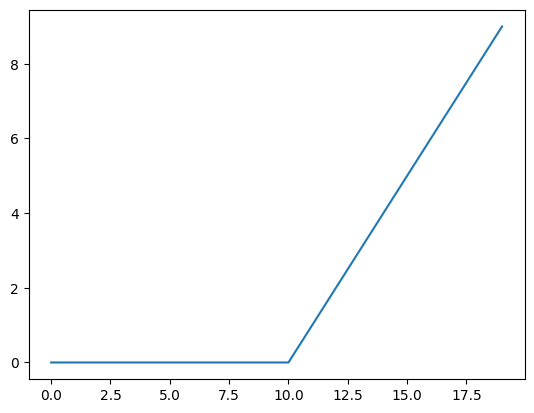

In [40]:
plt.plot(relu(A))

In [41]:
#Lets try the linear activation
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

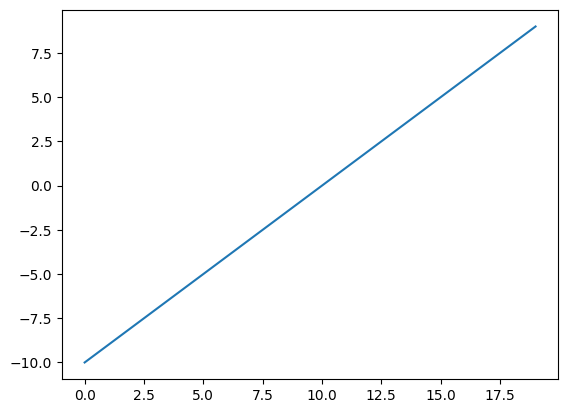

In [42]:
plt.plot(tf.keras.activations.linear(A))

In [43]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [44]:
len(X)

1000

In [45]:
#Split into train and test sets
X_train,y_train = X[:800],y[:800]
X_test,y_test = X[800:],y[800:]

X_train.shape,y_train.shape

((800, 2), (800,))

In [46]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation= "relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=["accuracy"])
history = model_8.fit(X_train,y_train,epochs=50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5352 - loss: 0.6935
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5165 - loss: 0.6877
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5171 - loss: 0.6821
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5356 - loss: 0.6750
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5754 - loss: 0.6662
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6288 - loss: 0.6548 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6344 - loss: 0.6337 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6550 - loss: 0.6083 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7267 - loss: 0.5692 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7618 - loss: 0.5338 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8010 - loss: 0.4961 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.852

In [47]:
model_8.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9818 - loss: 0.0612  


[0.07334413379430771, 0.9750000238418579]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classifcation...


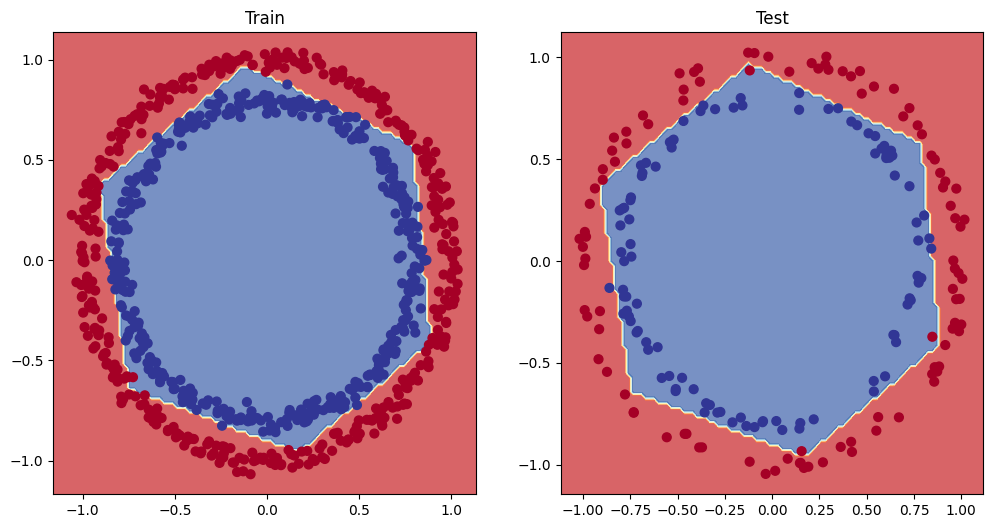

In [48]:
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X=X_test,y=y_test)
plt.show();

# Plot the loss curves

In [49]:
history.history

{'accuracy': [0.5087500214576721,
  0.5287500023841858,
  0.5362499952316284,
  0.5724999904632568,
  0.6025000214576721,
  0.6362500190734863,
  0.6462500095367432,
  0.675000011920929,
  0.7362499833106995,
  0.7712500095367432,
  0.8349999785423279,
  0.8675000071525574,
  0.893750011920929,
  0.9150000214576721,
  0.9350000023841858,
  0.9449999928474426,
  0.949999988079071,
  0.9612500071525574,
  0.9662500023841858,
  0.96875,
  0.9750000238418579,
  0.9750000238418579,
  0.9775000214576721,
  0.9750000238418579,
  0.9737499952316284,
  0.9775000214576721,
  0.9762499928474426,
  0.9762499928474426,
  0.9800000190734863,
  0.981249988079071,
  0.981249988079071,
  0.9825000166893005,
  0.9862499833106995,
  0.9862499833106995,
  0.9850000143051147,
  0.9850000143051147,
  0.9850000143051147,
  0.9862499833106995,
  0.9862499833106995,
  0.987500011920929,
  0.987500011920929,
  0.987500011920929,
  0.9862499833106995,
  0.9862499833106995,
  0.987500011920929,
  0.98624998331069

In [50]:
#Convert the history object into a DataFrame
pd.DataFrame(history.history)

,accuracy,loss
0,0.50875,0.692607
1,0.52875,0.685035
2,0.53625,0.677978
3,0.57250,0.669894
4,0.60250,0.660264
5,0.63625,0.646718
6,0.64625,0.626394
7,0.67500,0.596161
8,0.73625,0.554010
9,0.77125,0.518259


Text(0.5, 1.0, 'Model_8 Loss curves')

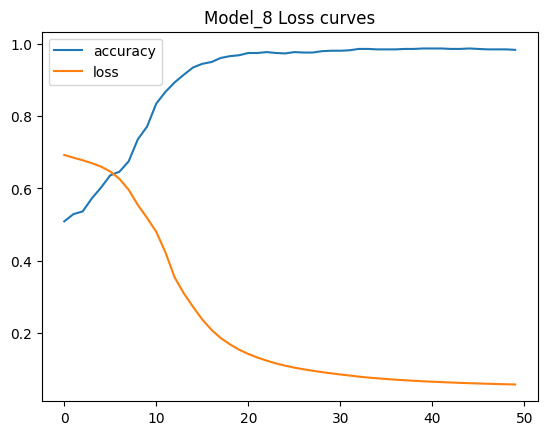

In [51]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 Loss curves")

## Finding the best learning rate
The following steps to find
* A learning rate **callback**
* Another model
* A modified loss curves plot

In [52]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

#Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))

history_9 = model_9.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5085 - loss: 0.7001 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5088 - loss: 0.6990 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5054 - loss: 0.6979 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5025 - loss: 0.6968 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5015 - loss: 0.6957 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5052 - loss: 0.6946 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5036 - loss: 0.6934 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4953 - loss: 0.6924 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4976 - loss: 0.6914 - learning_

<Axes: xlabel='Epochs'>

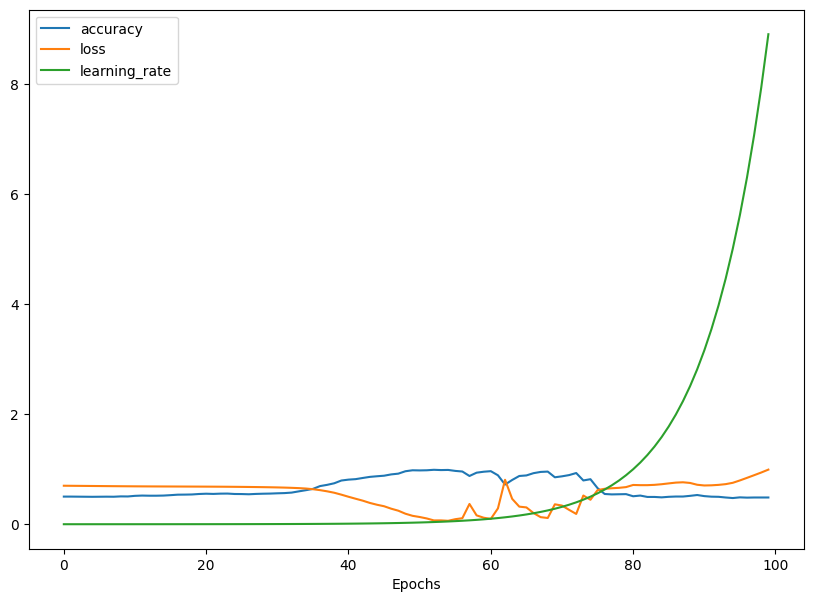

In [53]:
#Checkout the history
pd.DataFrame(history_9.history).plot(figsize = (10,7),xlabel="Epochs")

Text(0.5, 1.0, 'Learning Rate vs. Loss')

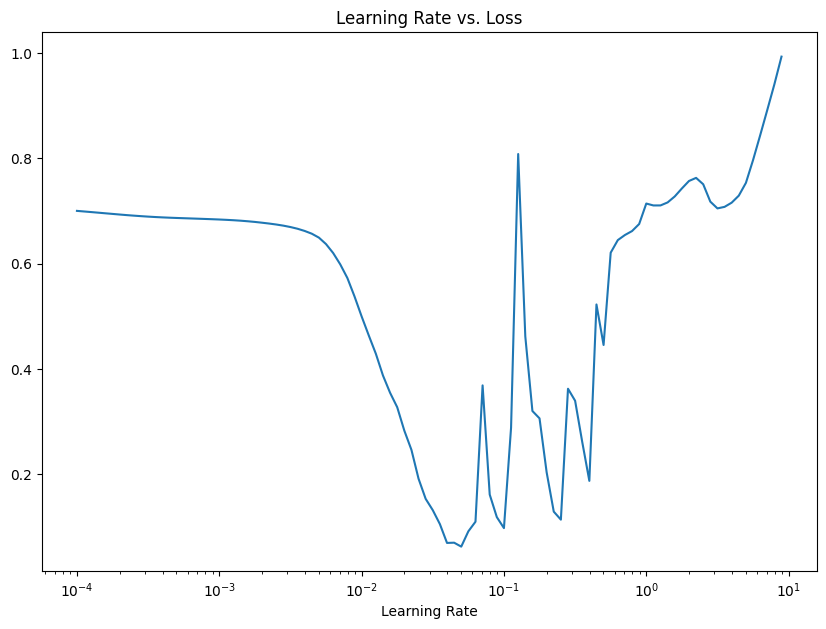

In [54]:
#Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.title("Learning Rate vs. Loss")

In [55]:
#Example of other typical learning rate values
10**0,10**-1,10**-2,10**-3,1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [56]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(0.02),
                 metrics=["accuracy"])

history_10 = model_10.fit(X_train,y_train,epochs = 50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5036 - loss: 0.7282
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4947 - loss: 0.6958 
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4984 - loss: 0.6932 
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4964 - loss: 0.6933
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4806 - loss: 0.6932 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4723 - loss: 0.6938 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4866 - loss: 0.6927 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5045 - loss: 0.6906 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5114 - loss: 0.6861 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5386 - loss: 0.6767 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5703 - loss: 0.6648 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

In [57]:
#Evaluate model 10
model_10.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9515 - loss: 0.1381  


[0.10921872407197952, 0.9599999785423279]

In [58]:
model_8.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9818 - loss: 0.0612 


[0.07334413379430771, 0.9750000238418579]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classifcation...


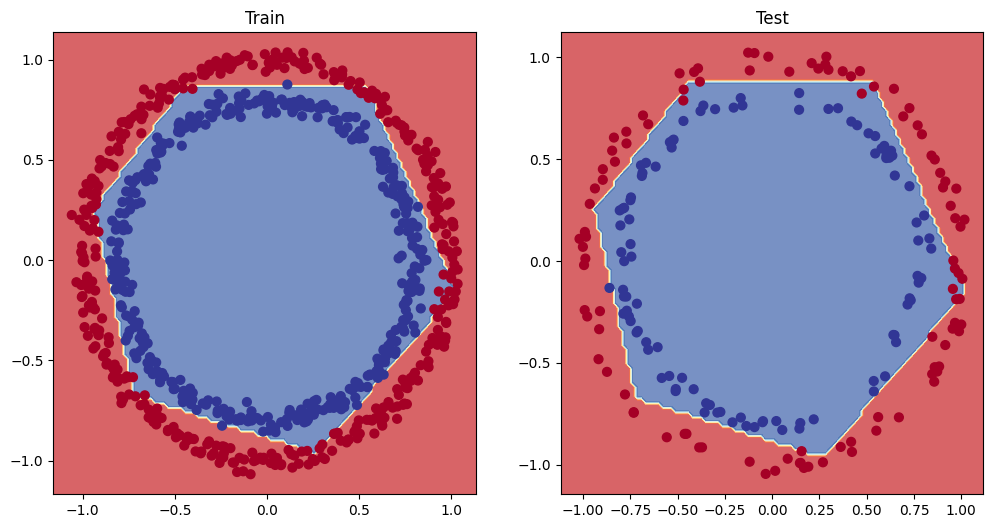

In [59]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X=X_test,y=y_test)
plt.show();

# Classification Evaluation Metrics

| **Metric name / Evaluation method** | **Definition** | **Code** |
|-------------------------------------|----------------|----------|
| **Accuracy** | Out of 100 predictions, how many does your model get correct? <br> E.g. 95% accuracy means it gets 95/100 predictions correct. | `sklearn.metrics.accuracy_score()` <br> `tf.keras.metrics.Accuracy()` |
| **Precision** | Proportion of true positives over total number of predicted positives. <br> Higher precision → fewer false positives (model predicts 1 when it should've been 0). | `sklearn.metrics.precision_score()` <br> `tf.keras.metrics.Precision()` |
| **Recall** | Proportion of true positives over total number of actual positives (true positives + false negatives). <br> Higher recall → fewer false negatives (model predicts 0 when it should've been 1). | `sklearn.metrics.recall_score()` <br> `tf.keras.metrics.Recall()` |
| **F1-score** | Harmonic mean of precision and recall. <br> Best = 1, Worst = 0. | `sklearn.metrics.f1_score()` |
| **Confusion matrix** | Compares predicted vs. true values in a tabular form. <br> If 100% correct → all values fall on diagonal (top-left → bottom-right). | `sklearn.metrics.confusion_matrix()` <br> `sklearn.metrics.ConfusionMatrixDisplay()` |
| **Classification report** | Collection of main classification metrics (precision, recall, f1-score, support). | `sklearn.metrics.classification_report()` |


# Classification Metrics – Ne Zaman Hangisi?

- **Accuracy (Doğruluk)**  
  Dengeli veri setlerinde kullanılır.  
  Örn: Kedi vs köpek sınıflandırma.  

- **Precision (Kesinlik)**  
  Yanlış pozitifler kritikse önemlidir.  
  Örn: Spam filtresi, sahte haber tespiti.  

- **Recall (Duyarlılık)**  
  Yanlış negatifler kritikse önemlidir.  
  Örn: Kanser tespiti, güvenlik taramaları.  

- **F1-score**  
  Precision + Recall dengesini sağlar. Özellikle dengesiz veri setlerinde tercih edilir.  
  Örn: Fraud (kredi kartı dolandırıcılığı) tespiti.  


## More classification evaluation methods

In [60]:
#Check the accuracy of our model
loss,accuracy = model_10.evaluate(X_test,y_test)
print(f"model loss on the test set : {loss}")
print(f"Model accuracy on the test set : {(accuracy*100):.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9515 - loss: 0.1381 
model loss on the test set : 0.10921872407197952
Model accuracy on the test set : 96.00


In [61]:
#How about a confusion matrix
from sklearn.metrics import confusion_matrix
y_preds = model_10.predict(X_test)

confusion_matrix(y_test,y_preds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [62]:
y_test[:10],y_preds[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]),
 array([[0.9827815 ],
        [0.9827815 ],
        [0.9827815 ],
        [0.9827815 ],
        [0.9665999 ],
        [0.00690188],
        [0.9827815 ],
        [0.03550219],
        [0.9827815 ],
        [0.00111246]], dtype=float32))

In [63]:
tf.round(y_preds[:10])

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [64]:
confusion_matrix(y_test,tf.round(y_preds))

array([[94,  7],
       [ 1, 98]])

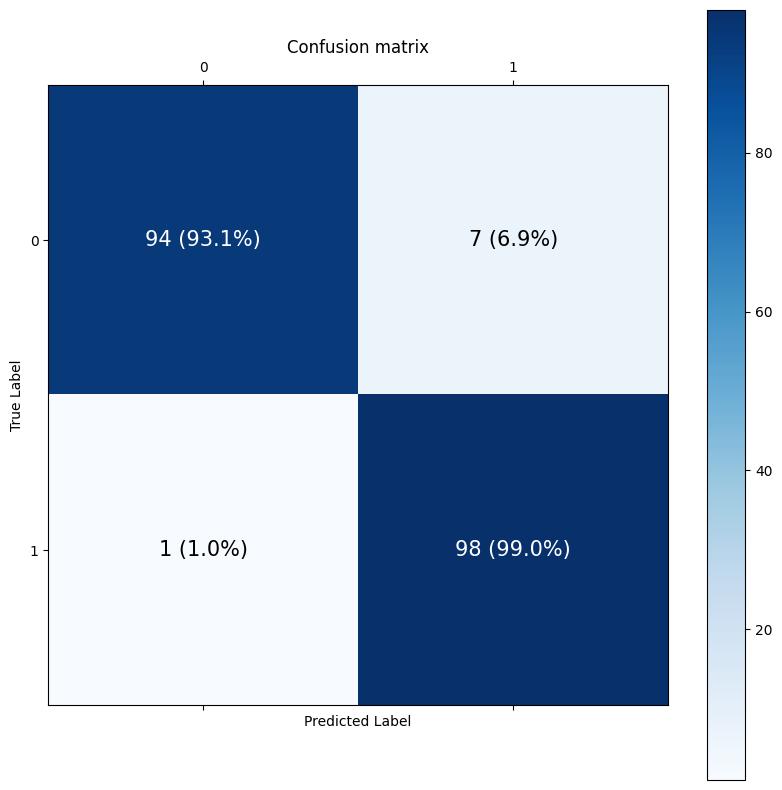

In [65]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize confusion matrix (her satiri kendi toplamina bolerek oran cikarir)
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)  # heatmap cizer ve renk yogunlugu = tahmin sayisi
fig.colorbar(cax)

# Create class labels
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(
    title="Confusion matrix",
    xlabel="Predicted Label",
    ylabel="True Label",
    xticks=np.arange(n_classes),
    yticks=np.arange(n_classes),
    xticklabels=labels,
    yticklabels=labels
)

# Set Threshold (to decide white/black text color)
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    ax.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
            ha="center", va="center",
            color="white" if cm[i, j] > threshold else "black",
            fontsize=15)


In [66]:
cm_norm,cm.shape[0]

(array([[0.93069307, 0.06930693],
        [0.01010101, 0.98989899]]),
 2)

## Multiclass classification
* this means if you have 3 different classes its multi class classification

In [67]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#The data has already been sorted into training and test sets for us
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [68]:
print(f"Training sample: \n {train_data[0]}")
print(f"Training label: \n {train_labels[0]}")

Training sample: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [69]:
train_data[0].shape,train_labels[0].shape

((28, 28), ())

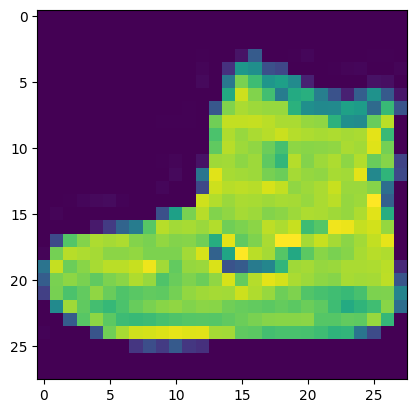

In [70]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

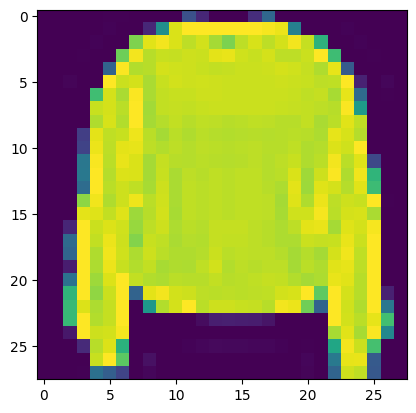

In [71]:
plt.imshow(train_data[7]);

In [72]:
#Check out samples label
train_labels[7]

np.uint8(2)

In [73]:
#Create a small list so we can index onto our training labels
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

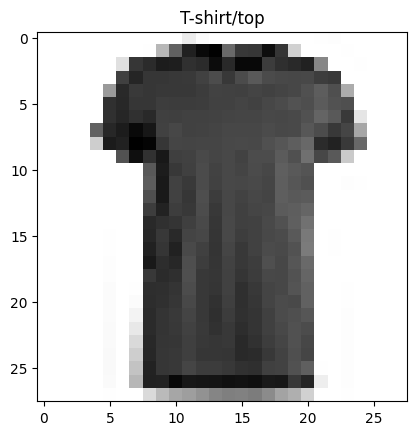

In [75]:
index_of_choice=17
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

Text(0.5, 1.0, 'Bag')

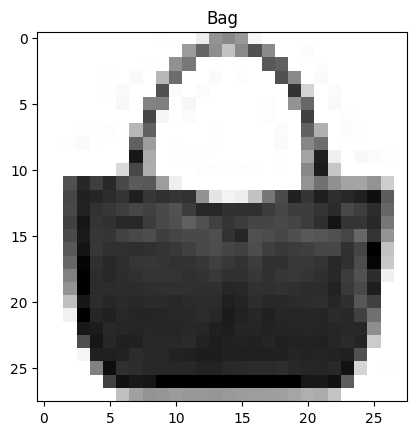

In [77]:
index_of_choice=100
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

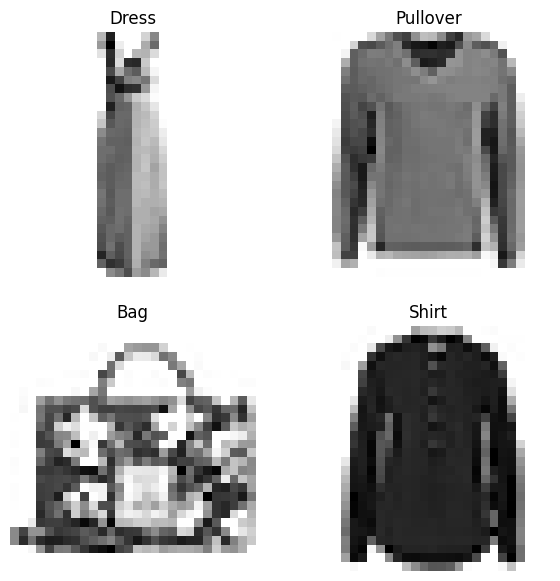

In [78]:
#Plot multiple random images of fashion MNIST

import random
plt.figure(figsize=(7,7)) #7x7 inch
for i in range(4):
  ax = plt.subplot(2,2,i+1) #2 satir 2 sutun
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary) #imshow goruntuyu cizer gri tonlama renk haritasi(siyah-beyaz)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False) #grafikteki eksen czigileri ve sayilari kapatiyor

## Building a multi class classification model

* Input shape 28x28(the shape of one image)
* Output shape 10
* If your labels are one hot encoded use CategoricalCrossentropy
If your labels are integer form use SparseCategoricalCrossentropy

In [79]:
len(class_names)

10

In [80]:
train_data[0].shape

(28, 28)

In [81]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #Flatten = çok boyutlu bir matrisi tek boyutlu bir vektöre çevirir.
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
]) #multi-class classification = softmax binary = sigmoid

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#Fit the model
non_norm_history = model_11.fit(train_data,train_labels
                                ,epochs=10,validation_data=(test_data,test_labels))
#loss = egitim verisi uzerindkei kayip
#accuracy egitim verisi uzerindeki dogruluk
#val_accuracy = test verisi uzerindeki dogruluk
#val_loss = test verisi uzeridneki kayip

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0994 - loss: 3.1777 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0986 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0998 - loss: 2.2984 - val_accuracy: 0.1954 - val_loss: 1.9638
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2416 - loss: 1.8551 - val_accuracy: 0.3001 - val_loss: 1.6621
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3016 - loss: 1.6289 - val_accuracy: 0.3012 - val_loss: 1.5766
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3113 - loss: 1.5456 - val_accuracy: 0.3101 - val_loss: 1.4908
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3219 - loss: 1.4806 - 